In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_excel("data/datathon2023_1/pred_AudienciasAsturias.xlsx")

In [2]:
# Filter out the columns with 'AM' and '_HOM' and '_MUJ' suffixes
male_columns = [col for col in df.columns if col.startswith('AM') and col.endswith('_HOM') and not col.startswith('AM_TTV')]
female_columns = [col for col in df.columns if col.startswith('AM') and col.endswith('_MUJ') and not col.startswith('AM_TTV')]

# Calculate the average audience for each TV and gender
male_data = df[male_columns].mean().rename(lambda x: x[3:-4], axis='index')
female_data = df[female_columns].mean().rename(lambda x: x[3:-4], axis='index')

# Create a new DataFrame for the TV-gender comparison
tv_gender_df = pd.DataFrame({'Male': male_data, 'Female': female_data})

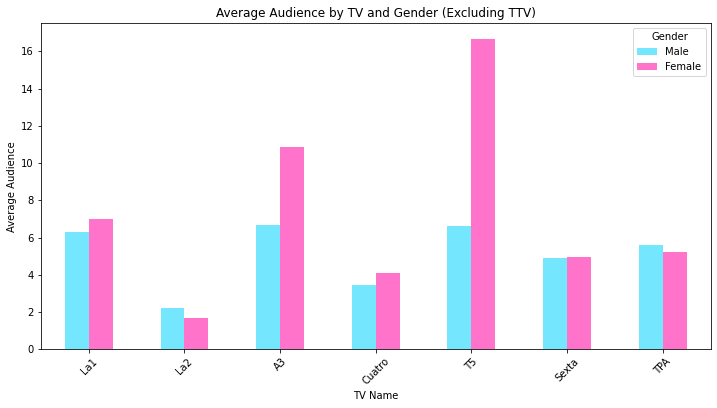

In [12]:
colors = ['#74E7FF', '#FF74CA']

# Bar plot comparing average audience for each TV
tv_gender_df.plot(kind='bar', figsize=(12, 6), color=colors)

plt.title('Average Audience by TV and Gender (Excluding TTV)')
plt.xlabel('TV Name')
plt.ylabel('Average Audience')
plt.xticks(rotation=45)
plt.legend(title='Gender')

plt.show()

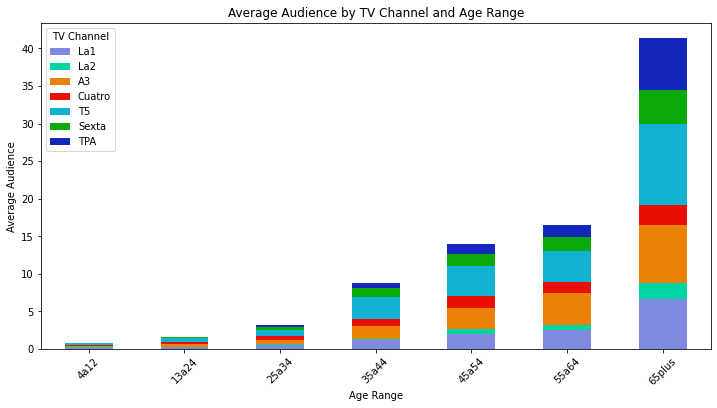

In [11]:
# List the age ranges
age_ranges = ['4a12', '13a24', '25a34', '35a44', '45a54', '55a64', '65plus']

# Create a new DataFrame to store the average audience by TV channel and age range
age_range_df = pd.DataFrame(columns=age_ranges)

# Loop through the age ranges and calculate the average audience for each TV channel
for age_range in age_ranges:
    age_columns = [col for col in df.columns if col.startswith('AM') and col.endswith(age_range)  and not col.startswith('AM_TTV')]
    age_data = df[age_columns].mean().rename(lambda x: x[3:-len(age_range)-1], axis='index')
    age_range_df[age_range] = age_data

# Transpose the DataFrame to have the age ranges as rows and TV channels as columns
age_range_df = age_range_df.transpose()

# Colors
colors = ['#7D8ADF', '#00D4A0', '#EB8208', '#E90F05', '#13B2D2', '#0CA909', '#1628BC']

# Stacked bar plot comparing average audience for different age ranges
age_range_df.plot(kind='bar', stacked=True, figsize=(12, 6), color=colors)



plt.title('Average Audience by TV Channel and Age Range')
plt.xlabel('Age Range')
plt.ylabel('Average Audience')
plt.xticks(rotation=45)
plt.legend(title='TV Channel')

plt.show()